In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt


In [2]:

print(tf.__version__)
print(np.__version__)

2.6.2
1.19.5


In [4]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 1s 0us/step


In [6]:
train_images.shape

(60000, 28, 28)

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [9]:
train_labels[0]

9

In [10]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [11]:
train_images[0].shape

(28, 28)

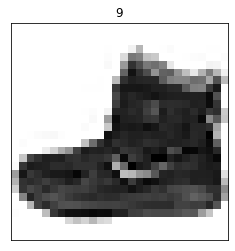

In [12]:
plt.imshow(train_images[0],cmap='gray_r')
plt.title(train_labels[0])
plt.xticks([])
plt.yticks([])
plt.show()

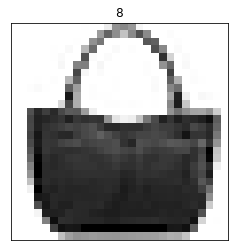

In [13]:
plt.imshow(train_images[100],cmap='gray_r')
plt.title(train_labels[100])
plt.xticks([])
plt.yticks([])
plt.show()

In [14]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [15]:
len(class_names)

10

In [16]:
class_names[1]

'Trouser'

In [17]:
class_names[8]

'Bag'

In [18]:
class_names[train_labels[100]]

'Bag'

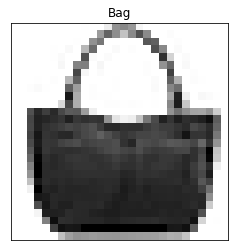

In [19]:
plt.imshow(train_images[100],cmap='gray_r')
plt.title(class_names[train_labels[100]])
plt.xticks([])
plt.yticks([])
plt.show()

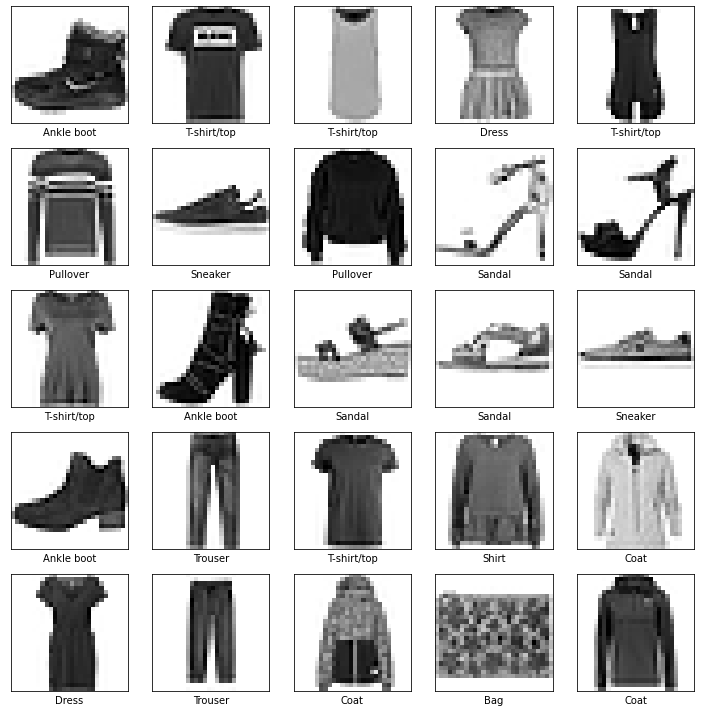

In [20]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.tight_layout()
plt.show()

In [21]:
train_images = train_images / 255.0

test_images = test_images / 255.0

In [22]:
train_images[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [24]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [27]:
 history = model.fit(train_images, train_labels,validation_split=0.2, epochs=15,verbose=1)

Epoch 1/15


C:\Users\Admin\.conda\envs\deepl1\lib\site-packages\keras\backend.py:4907: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


1500/1500 [==============================] - 16s 8ms/step - loss: 0.4874 - accuracy: 0.8267 - val_loss: 0.4105 - val_accuracy: 0.8413
Epoch 2/15
1500/1500 [==============================] - 11s 7ms/step - loss: 0.3672 - accuracy: 0.8660 - val_loss: 0.3586 - val_accuracy: 0.8716
Epoch 3/15
1500/1500 [==============================] - 10s 7ms/step - loss: 0.3308 - accuracy: 0.8772 - val_loss: 0.3403 - val_accuracy: 0.8744
Epoch 4/15
1500/1500 [==============================] - 12s 8ms/step - loss: 0.3046 - accuracy: 0.8876 - val_loss: 0.3330 - val_accuracy: 0.8801
Epoch 5/15
1500/1500 [==============================] - 11s 8ms/step - loss: 0.2870 - accuracy: 0.8934 - val_loss: 0.3568 - val_accuracy: 0.8695
Epoch 6/15
1500/1500 [==============================] - 11s 7ms/step - loss: 0.2676 - accuracy: 0.9003 - val_loss: 0.3526 - val_accuracy: 0.8742
Epoch 7/15
1500/1500 [==============================] - 11s 7ms/step - loss: 0.2552 - accuracy: 0.9055 - val_loss: 0.3292 - val_accuracy: 0.8

In [28]:
history.history

{'loss': [0.48744726181030273,
  0.3671930730342865,
  0.3308051824569702,
  0.3046073913574219,
  0.28704825043678284,
  0.2675670385360718,
  0.25518789887428284,
  0.24212469160556793,
  0.23421688377857208,
  0.2230902463197708,
  0.21543045341968536,
  0.20490588247776031,
  0.19822236895561218,
  0.18939363956451416,
  0.18395546078681946],
 'accuracy': [0.8266666531562805,
  0.8659583330154419,
  0.8772291541099548,
  0.8876041769981384,
  0.8933749794960022,
  0.9003124833106995,
  0.9054999947547913,
  0.9101666808128357,
  0.9127500057220459,
  0.9157500267028809,
  0.9180208444595337,
  0.9232916831970215,
  0.9252291917800903,
  0.9283958077430725,
  0.9308333396911621],
 'val_loss': [0.41054582595825195,
  0.3586213290691376,
  0.34031206369400024,
  0.33302173018455505,
  0.356834352016449,
  0.35262712836265564,
  0.32917770743370056,
  0.3104826807975769,
  0.3262892961502075,
  0.3242091238498688,
  0.3421960771083832,
  0.3329847753047943,
  0.32010844349861145,
  0.3

In [29]:
history.history['accuracy']

[0.8266666531562805,
 0.8659583330154419,
 0.8772291541099548,
 0.8876041769981384,
 0.8933749794960022,
 0.9003124833106995,
 0.9054999947547913,
 0.9101666808128357,
 0.9127500057220459,
 0.9157500267028809,
 0.9180208444595337,
 0.9232916831970215,
 0.9252291917800903,
 0.9283958077430725,
 0.9308333396911621]

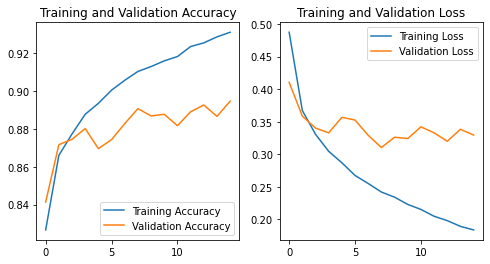

In [30]:
epochs = 15
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()